# Titanic - Machine Learning from Disaster

LEARNING FROM
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions


In [1]:
import numpy as np
import pandas as pd
import os

## LOAD DATA

In [5]:

cwd = os.getcwd()
# print(cwd)
# train_data = pd.read_csv(os.path.join(
#     cwd, "/input/train.csv"
# ))
train_data = pd.read_csv(".\\input\\train.csv")
test_data = pd.read_csv(".\\input\\test.csv")
# test_data = pd.read_csv(os.path.join(
#     cwd, "Titanic-Machine-Learning-from-Disaster/input/test.csv"
# ))

# combined = [train_data, test_data]

## A LOOK AT DATA

In [7]:
train_data.columns.values
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- categorical ones?
- numerical ones? continuous or discrete?
- some points:
    - Ticket is a mix of numeric and alphanumeric data types.
    Cabin is alphanumeric.
- which features may contain errors or typos?
- which features contain NAs? Cabin, Age, Embarked

In [8]:
train_data.info()
print('=' * 50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## DESCRIBE DATA DISTRIBUTION
- include=["O"] selects non-numeric columns
- EMBARKED => where the passenger got on board?

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## SOME ASSUMPTIONS BY THE DATA PROVIDER
- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

In [13]:
## choose only the grouping column and the aggregated column
print(train_data[["Pclass", "Survived"]]
        .groupby("Pclass")
        .mean()
        .sort_values(by="Survived", ascending=False))
print('=' * 50)
print(train_data[["Sex", "Survived"]]
        .groupby("Sex")
        .mean()
        .sort_values(by="Survived", ascending=False))
print('=' * 50)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
        Survived
Sex             
female  0.742038
male    0.188908


In [18]:
print(train_data[["SibSp", "Survived"]]
        .groupby("SibSp")
        .mean())
        # .sort_values(by="Survived", ascending=False))
print('=' * 50)
print(train_data[["Parch", "Survived"]]
        .groupby("Parch")
        .mean()
        .sort_values(by="Survived", ascending=False))

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

## SOME VISUALIZATIONS
- to show relationships between variables

### VISUALIZING NUMERICAL VARIABLE (Age)

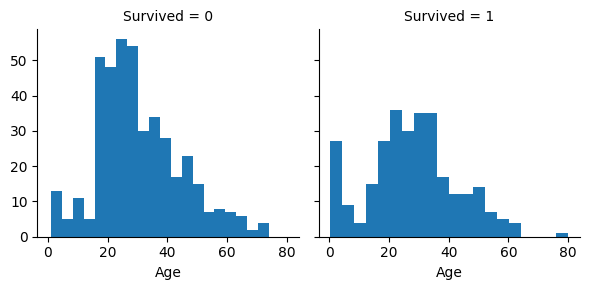

In [21]:
g = sns.FacetGrid(train_data, col="Survived")
g.map(plt.hist, "Age", bins=20)


### VISUALIZING ORDINAL VARIABLE (Pclass)

In [ ]:
grid = sns.FacetGrid(train_data, col="Survived", row="Pclass")
grid.map(plt.hist, "Age", bins=20)

### VISUALIZING CATEGORICAL VARIABLE (Embarked)

In [ ]:
grid = sns.FacetGrid(train_data, col="Embarked")
grid.map(sns.pointplot,
        "Pclass", "Survived", "Sex",
        palette="deep"
)
grid.add_legend()

### CORRELATE CATEGORICAL FEATURES AND NUMERIC FEATURES
- 个人觉得这图没什么用


d:\L\Python\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


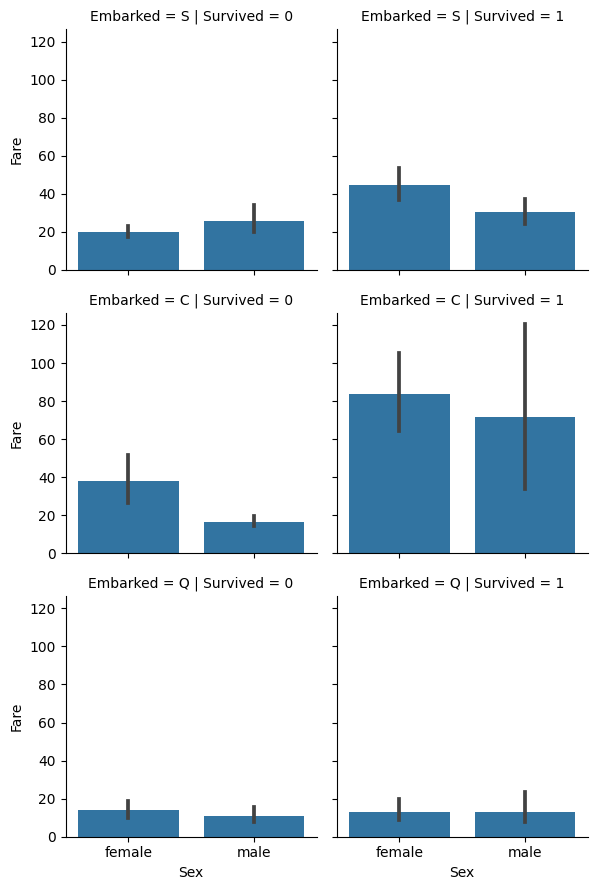

In [24]:
grid = sns.FacetGrid(train_data,
                    row="Embarked", col="Survived")
grid.map(sns.barplot,
        "Sex", "Fare",
        # palette="deep"
)
grid.add_legend()

## DROP SOME VARIABLES (Ticket, Cabin)
- messy data, and not really useful

In [25]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combined = [train_data, test_data]

## CREATE NEW FEATURE

### extract Title from Name

In [28]:
for dataset in combined:
    dataset["Title"] = dataset["Name"].str.extract(
        '([A-Za-z]+)\.', expand=False
    )
pd.crosstab(train_data["Title"], train_data["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [29]:
## put many titles with a more common name
for dataset in combined:
    dataset["Title"] = dataset["Title"].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
         'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
        'Rare'
    )
    dataset['Title'] = dataset['Title'].replace("Mlle", "Miss")
    dataset['Title'] = dataset['Title'].replace("Ms", "Miss")
    dataset['Title'] = dataset['Title'].replace("Mme", "Mrs")
train_data[["Title", "Survived"]].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [30]:
## convert categorical Title into ordinal
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Rare": 5,
}
for dataset in combined:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"].fillna(0, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## CONTINUE DROPPING FEATURES
- Name now replaced by Title
- drop PassengerId

In [31]:
train_data = train_data.drop(["Name", "PassengerId"], axis=1)
test_data = test_data.drop(["Name"], axis=1)
combined = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))